## 타이타닉 생존자 예측 모델
- 탑승객 정보를 기반으로 해당 합승객의 생존 여부를 예측

In [86]:
# 데이터 로드
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head(3)

df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [74]:
# EDA (Exploratory Data Analysis)
print(df_train.columns) # train
print(df_test.columns) # test

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [75]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [6]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [76]:
# null 데이터 개수 체크
print(df_train.isna().sum())
print(df_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [77]:
df_train["Survived"] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [78]:
# 어떤 컬럼을 살리고, 어떤 컬럼을 지울 것인가? => 시각화를 통해서 진행
import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart(column_name):
    survived = df_train[df_train["Survived"] == 1][column_name].value_counts()
    dead = df_train[df_train["Survived"] == 0][column_name].value_counts()

    df_merged = pd.DataFrame({"Survived" : survived, "Dead" : dead})
    df_merged.plot(kind = "bar", stacked = True, figsize = (12, 8))

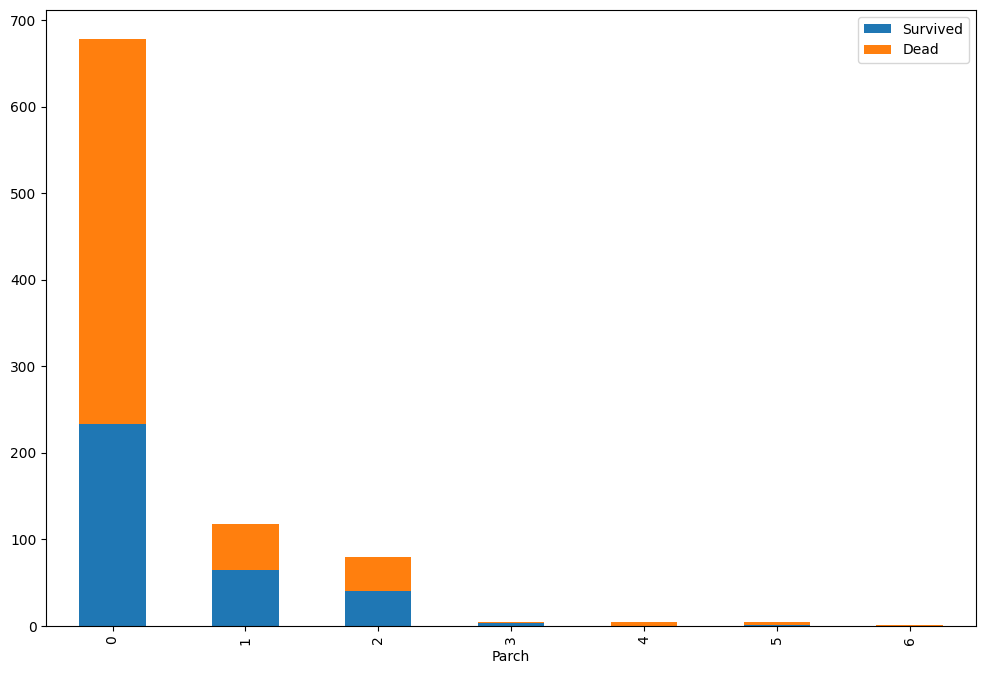

In [79]:
# 어떤 컬럼이 생존확률에 영향을 미칠까?
bar_chart("Parch")

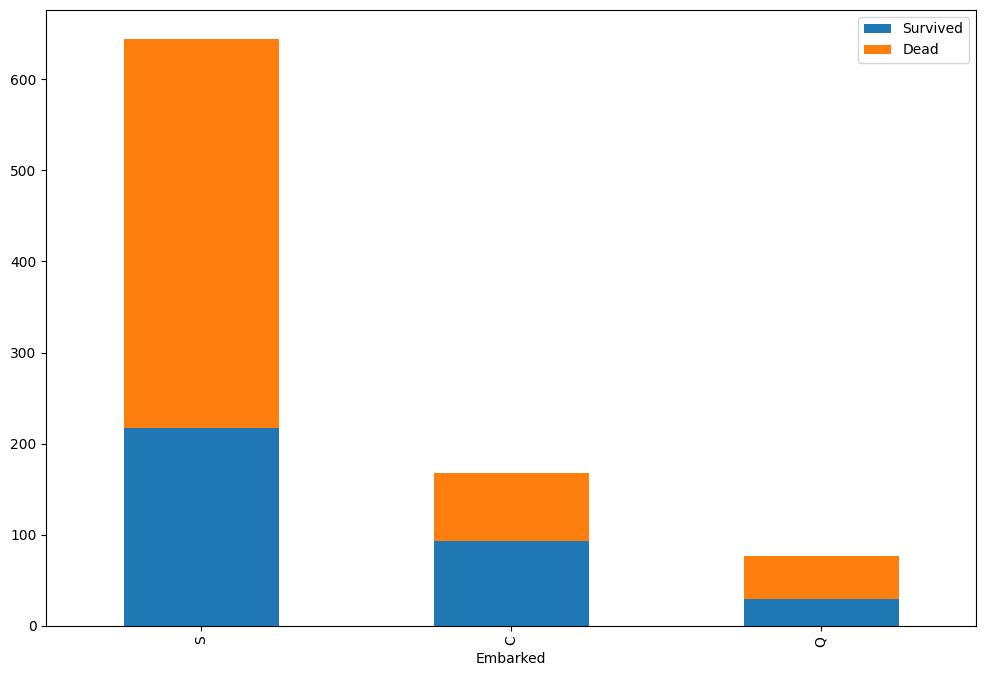

In [80]:
bar_chart("Embarked")

In [81]:
# 가장 많은 요금을 낸 상위 10명의 생존율은 어떻게 될까?
df_train.sort_values(by = "Fare", ascending = False).head(10)[["Survived", "Fare"]].value_counts()
df_train.sort_values(by = "Fare", ascending = False).head(10)["Survived"].value_counts()

df_train.sort_values(by = "Fare", ascending = False).tail(10)["Survived"].value_counts() # 헐 하나 생존

Survived
0    9
1    1
Name: count, dtype: int64

In [87]:
train_test_data = [df_train, df_test]

for data in train_test_data:
    data["Name"] = data["Name"].str.extract(" ([A-Za-z]+)\. ")

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/04/29j5qsq93pbf1r254q557w_80000gn/T/ipykernel_94969/1358189701.py:4: SyntaxWarning: invalid escape sequence '\.'
  data["Name"] = data["Name"].str.extract(" ([A-Za-z]+)\. ")


In [89]:
df_train["Name"].value_counts()

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [90]:
# 문자열 -> 숫자형 데이터로 변경
name_mapping = {
    "Mr" : 0,
    "Miss" : 1,
    "Mrs" : 2,
    "Master" : 3,
    "Dr" : 4,
    "Rev" : 3
}

for data in train_test_data:
    data["Name"] = data["Name"].map(name_mapping)

In [91]:
df_train["Name"].value_counts()

Name
0.0    517
1.0    182
2.0    125
3.0     46
4.0      7
Name: count, dtype: int64

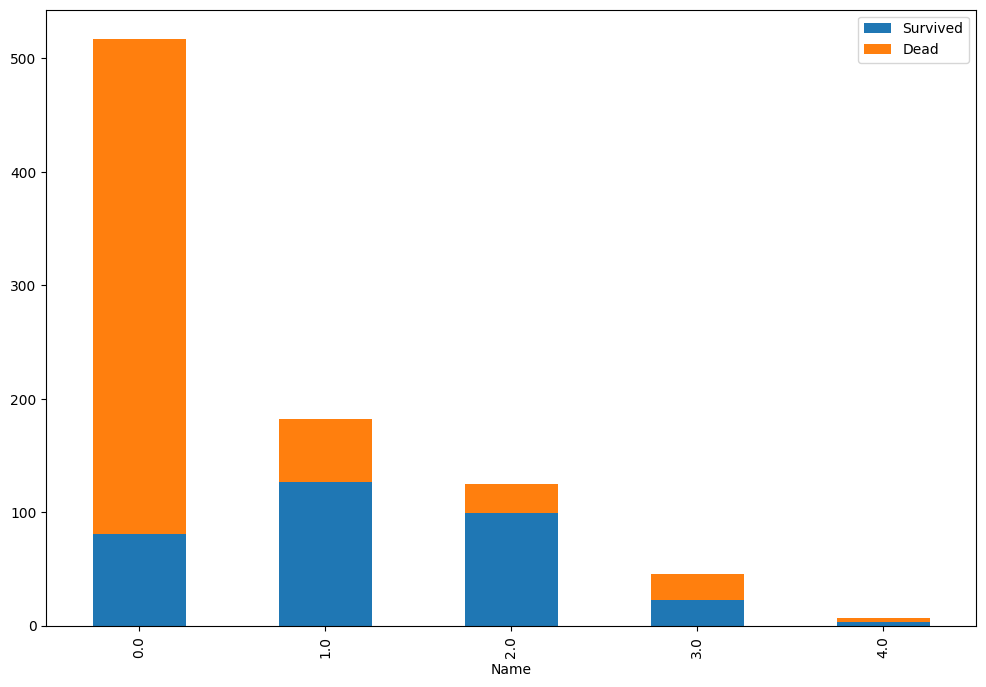

In [92]:
bar_chart("Name")

In [93]:
# Sex
df_train['Sex'] = df_train['Sex'].replace({'male' : 0, 'female' : 1})
df_test['Sex'] = df_test['Sex'].replace({'male' : 0, 'female' : 1})

/var/folders/04/29j5qsq93pbf1r254q557w_80000gn/T/ipykernel_94969/2240324916.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace({'male' : 0, 'female' : 1})
/var/folders/04/29j5qsq93pbf1r254q557w_80000gn/T/ipykernel_94969/2240324916.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex'] = df_test['Sex'].replace({'male' : 0, 'female' : 1})


In [94]:
# df_train['Sex'].value_counts
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,2.0,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1.0,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,2.0,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3.0,0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,1.0,1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,1.0,1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0.0,0,26.0,0,0,111369,30.0000,C148,C


In [103]:
# Age
df_train["Age"].fillna(df_train.groupby("Name")["Age"].transform("mean"))
df_test["Age"].fillna(df_test.groupby("Name")["Age"].transform("mean"))

0      34.500000
1      47.000000
2      62.000000
3      27.000000
4      22.000000
         ...    
413    32.000000
414    39.000000
415    38.500000
416    32.000000
417    10.363684
Name: Age, Length: 418, dtype: float64

In [104]:
df_train["Age"].isna().sum()

np.int64(0)

In [105]:
df_test["Age"].isna().sum()

np.int64(0)

In [107]:
"""
FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.
"""

# Pandas 3.0 에서는 inplace = True 방식이 점진적으로 제거될 예정이라 사용하지 않는 것이 좋다

"\nFutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.\nThe behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.\n\nFor example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.\n"